In [1]:
# Load the Libraries
import pandas as pd
import numpy as np
from sklearn import tree
from sklearn import preprocessing
from sklearn.ensemble import AdaBoostClassifier  
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
import matplotlib.pyplot as plt
%matplotlib inline

# Setting the working directory

In [2]:
import os as os 

In [3]:
os.chdir('C:\\Users\\MyPC\\Desktop\\Project 10 Decision Tree(Py.)')

In [4]:
os.getcwd()

'C:\\Users\\MyPC\\Desktop\\Project 10 Decision Tree(Py.)'

In [5]:
os.listdir()

['bank-additional-full.csv',
 'Problem Statement.docx',
 '~$oblem Statement.docx']

In [6]:
# Load the data 
data = pd.read_csv("bank-additional-full.csv",delimiter=';')
data.head()



,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [7]:
#from IPython.display import display
#pd.options.display.max_columns = None
#pd.options.display.max_rows = None

In [8]:
#display(data)  

In [7]:
import warnings
warnings.filterwarnings('ignore')

# Label Encoding for Target Variable

In [8]:
c_y = {"y": {"yes": 1, "no": 0}}
data.replace(c_y, inplace=True)
data.head()



,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0


# Spliting Target Variable

In [9]:
+predictor = data.iloc[:, data.columns !='y']  # all input
target = data.iloc[:, data.columns=='y']   # target



# One Hot Encoding for Categorical Variables

In [10]:
# save all categorical columns in list 
categorical_columns = [col for col in predictor.columns.values if predictor[col].dtype == 'object']

# dataframe with categorical features
data_cat = predictor[categorical_columns]

# dataframe with numerical features
data_num = predictor.drop(categorical_columns, axis=1)


In [11]:
# Using pandas.get_dummies function to Convert categorical variable into dummy/indicator variables
data_cat_dummies = pd.get_dummies(data_cat,drop_first=True)


In [12]:
# using concat function we merging two dataframe for further analysis
predictor = pd.concat([data_num, data_cat_dummies], axis=1)


In [13]:
predictor.head()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,...,month_may,month_nov,month_oct,month_sep,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_nonexistent,poutcome_success
0,56,261,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,1,0,0,0,1,0,0,0,1,0
1,57,149,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,1,0,0,0,1,0,0,0,1,0
2,37,226,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,1,0,0,0,1,0,0,0,1,0
3,40,151,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,1,0,0,0,1,0,0,0,1,0
4,56,307,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,1,0,0,0,1,0,0,0,1,0


# Spliting Dataset into Train and Test

In [14]:
# Let us now split the dataset into train and test
from sklearn.model_selection import train_test_split
x_train,x_test, y_train, y_test = train_test_split(predictor, target, test_size = 0.30, random_state=0)
print("x_train",x_train.shape)
print("x_test",x_test.shape)
print("y_train",y_train.shape)
print("y_test",y_test.shape)



x_train (28831, 53)
x_test (12357, 53)
y_train (28831, 1)
y_test (12357, 1)


# Decision Tree classifier

In [15]:
# Create decision tree classfier object using gini index
clf_DT = DecisionTreeClassifier(criterion='gini', random_state=0)



In [16]:
# Train model
model_DT = clf_DT.fit(x_train,y_train)  

# Prediction the model
y_pred_DT = model_DT.predict(x_test) 
y_pred_DT

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

# ROC curve for Decision Tree Classifier

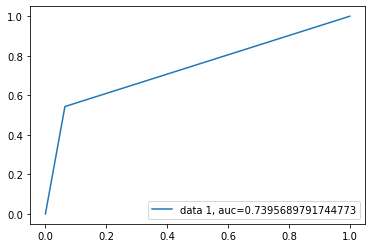

In [17]:
y_pred_proba = model_DT.predict_proba(x_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test, y_pred_proba)   
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

The area under the curve seems be 0.74 

# Random Forest Classifier

In [18]:
from sklearn.ensemble import RandomForestClassifier

# Create random tree classifier object
clf_RF = RandomForestClassifier(random_state=0)


In [23]:
?RandomForestClassifier

In [19]:
# Train model
model_RF = clf_RF.fit(x_train,y_train)

# Prediction the model
y_pred_RF = model_RF.predict(x_test)

# ROC curve of Random Forest Classifier

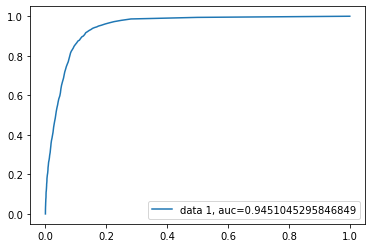

In [20]:
y_pred_proba = model_RF.predict_proba(x_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test, y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

There is a significant jumb of auc=0.94

# Feature Impotance

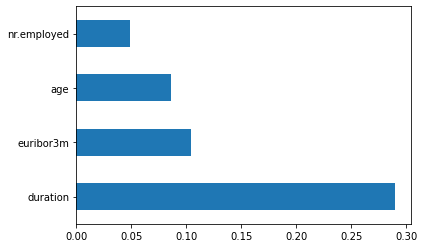

In [21]:
(pd.Series(model_RF.feature_importances_,index=predictor.columns)
 .nlargest(4)        # here we are just consider 4 largest variables.
 .plot(kind='barh'))



# Bagging Classifier

As they provide a way to reduce overfitting, bagging methods work best with strong and complex models, in contrast with
boosting methods which usually work best with weak models.

In [22]:
from sklearn.ensemble import BaggingClassifier
bagging = BaggingClassifier(model_RF, random_state=1)
bagging.fit(x_train,y_train)

# here we are use the bag random forest.

BaggingClassifier(base_estimator=RandomForestClassifier(random_state=0),
                  random_state=1)

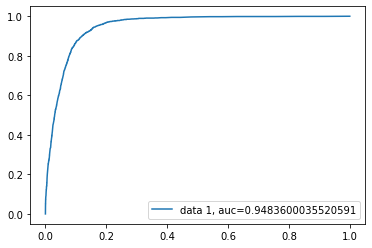

In [28]:
y_pred_proba = bagging.predict_proba(x_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test, y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

Here out model is marginally improved. It is now 0.95

In [29]:
bagging.predict(x_test)

array([1, 0, 0, ..., 0, 0, 1], dtype=int64)

# Adaboost Classifier

In [30]:
# Create adaboost-decision tree classifier object
clf_ABC1 = AdaBoostClassifier(n_estimators=50,   # no. of estimators we have created 50
                             learning_rate=1,    # learning rate is 1
                             random_state=0)

In [31]:
# Train model
clf_ABC1 = clf_ABC1.fit(x_train,y_train)

# Predicting the model
y_pred_ABC1 = clf_ABC1.predict(x_test)

In [32]:
y_pred_ABC1

array([0, 0, 0, ..., 0, 0, 1], dtype=int64)

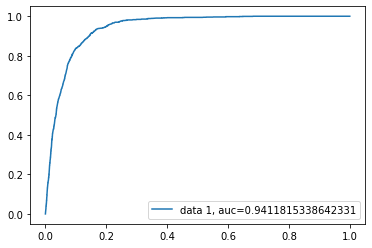

In [33]:
# Roc curve
y_pred_proba = clf_ABC1.predict_proba(x_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test, y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

The performance does not improve much, its slitly goes down.
So best was bagging, it was gives us best performance.

In [36]:
cols = ['Model', 'ROC Score', 'Precision Score', 'Recall Score', 'Accuracy Score', 'Kappa Score']
model_report = pd.DataFrame(columns = cols)

tmp1 = pd.Series({'Model':"Adaboost Classifier",
                 'ROC Score' : metrics.roc_auc_score(y_test, y_pred_ABC1),
                 'Precision Score':metrics.precision_score(y_test, y_pred_ABC1),
                 'Recall Score': metrics.recall_score(y_test,y_pred_ABC1),
                 'Accuracy Score': metrics.accuracy_score(y_test,y_pred_ABC1),
                 'Kappa Score': metrics.cohen_kappa_score(y_test,y_pred_ABC1)})

model_abc1_report = model_report.append(tmp1,ignore_index = True)
model_abc1_report

# here we are just generating the summary report.

,Model,ROC Score,Precision Score,Recall Score,Accuracy Score,Kappa Score
0,Adaboost Classifier,0.7013,0.675369,0.428674,0.912681,0.479017


From the above informations, Adaboost classifier and Random Forest gives optimum results.

We are going to consider that Bagging is best classifier.